# Computational and Differential Geometry Homework 3
**Por: Juan Camilo Rodríguez & Maria Fernanda Rodríguez Conde**

**Profesor: Nicolás Avilán Vargas**

In [1]:
'''Importamos todas las librerias necesarias'''

import sympy as sp
from sympy import lambdify, sin, cos 
import matplotlib.pyplot as plt 
import numpy as np
from sympy.plotting import plot_parametric
import pandas as pd

## First part

#### Primer punto
1. Implement the 1D Range Searching algorithm to run a query of the interval [1000 : 3000] for the variable “Concavidad”. Print the cell IDs for the results of the query.


In [2]:
'''Primero, vamos a leer el archivo cancer2.csv'''

url = 'https://github.com/nicoavilan/Bases-de-datos/blob/main/cancer2.csv?raw=true'
df = pd.read_csv(url)
df

,ID,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
0,842302,M,1799,1038,1228,1001,1184,2776,3001,1471,...,2538,1733,1846,2019,1622,6656,7119,2654,4601,1189
1,842517,M,2057,1777,1329,1326,8474,7864,869,7017,...,2499,2341,1588,1956,1238,1866,2416,186,275,8902
2,84300903,M,1969,2125,130,1203,1096,1599,1974,1279,...,2357,2553,1525,1709,1444,4245,4504,243,3613,8758
3,84348301,M,1142,2038,7758,3861,1425,2839,2414,1052,...,1491,265,9887,5677,2098,8663,6869,2575,6638,173
4,84358402,M,2029,1434,1351,1297,1003,1328,198,1043,...,2254,1667,1522,1575,1374,205,4,1625,2364,7678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,926125,M,2092,2509,143,1347,1099,2236,3174,1474,...,2429,2941,1791,1819,1407,4186,6599,2542,2929,9873
487,926424,M,2156,2239,142,1479,111,1159,2439,1389,...,2545,264,1661,2027,141,2113,4107,2216,206,7115
488,926682,M,2013,2825,1312,1261,978,1034,144,9791,...,2369,3825,155,1731,1166,1922,3215,1628,2572,6637
489,926954,M,166,2808,1083,8581,8455,1023,9251,5302,...,1898,3412,1267,1124,1139,3094,3403,1418,2218,782


In [3]:
'''Ahora, vamos a definir la clase 'Node' junto con las funciones que usaremos para crear la estructura de dato que necesitamos (Binary tree).'''
class Node:
  def __init__(self, data):
    self.data= data
    self.right= None
    self.left= None

def insertBST(root, node):
  '''Actualizamos el árbol con raíz root (Insertamos el nuevo nodo node).'''
  if (node.data < root.data):
    if root.left is None:
      root.left = node
    else:
      insertBST(root.left, node)
  else: 
    if root.right is None:
      root.right = node
    else:
      insertBST(root.right, node)

def preOrder(node):
  '''
  Visualizamos los datos que tenemos actualmente en el árbol. Recorremos el árbol 
  empezando en la raíz y luego sus hijos empezando por el izquierdo y finalizando 
  en el derecho.
  '''
  
  if not node:
    return 
  print(node.data)
  preOrder(node.left)
  preOrder(node.right)
 
def inorder(root):
  '''Retorna un arreglo con los datos de los nodos ordenados de menos a mayor.'''

  inorderArr=[]

  if root.left is not None:
    leftInorderArr = inorder(root.left)
    inorderArr.extend(leftInorderArr)
  
  inorderArr.append(root.data)

  if root.right is not None:
    rightInorderArr = inorder(root.right)
    inorderArr.extend(rightInorderArr)

  return inorderArr

def BalancedTreeFromSortArray(sortedArr):
  '''Creamos un árbol nuevo (Balanceado) usando el arreglo ordenado previamente.'''

  if not sortedArr:
    return None
  
  mid = len(sortedArr)//2
  newRoot = Node(sortedArr[mid])
  newRoot.left = BalancedTreeFromSortArray(sortedArr[:mid])
  newRoot.right = BalancedTreeFromSortArray(sortedArr[mid +1:])  

  return newRoot

* Basado en el codigo del profesor Nicolás Avilán Vargas trabajado en clase 
---

In [4]:
def BusquedaKd(Interval, Vals,root):
  '''Función que retorna los valores del árbol que se encuentran dentro del intervalo dado'''
  if Interval[0]<=root.data<=Interval[1]:
    Vals.append(root.data)

  if root.left == None and root.right == None:
    return None

  elif root.left != None and root.right == None:
    BusquedaKd(Interval,Vals,root.left)

  elif root.left == None and root.right != None:
    BusquedaKd(Interval,Vals,root.right)

  else:
    BusquedaKd(Interval,Vals,root.left)
    BusquedaKd(Interval,Vals,root.right)

def IDsValues(Array,df,a,b):
  '''Función que retorna los ID's de los valores que se encontraron dentro del intervalo'''
  val=[]
  IndexList=[]
  for i in Array:
    x=df.index[df[a]==i]
    val.append(x)
  for i in val:
    IndexList.append(i[0])

  IndexList.sort()
  IDS=[]
  aVals=[]

  for i in IndexList:
    x=df[b][i]
    y=df[a][i]
    IDS.append(x)
    aVals.append(y)

  DF_Info=pd.DataFrame()
  DF_Info[a]=aVals
  DF_Info[b]=IDS
  return DF_Info

In [5]:
'''Creamos el árbol con los datos de Concavidad'''
Datos_C=df['Concavidad']

root=Node(Datos_C[0])
for i in range(1,len(Datos_C)):
  insertBST(root, Node(Datos_C[i]))

'''Creamos un nuevo árbol balanceado a partir del árbol creado anteriormente'''
OrdedArr=inorder(root)
BalancedTree=BalancedTreeFromSortArray(OrdedArr)

'''Buscamos los datos que están entre el intervalo de búsqueda'''
Vals = []
Interval = [1000,3000]
BusquedaKd(Interval, Vals,BalancedTree)

In [6]:
IDsVal=IDsValues(Vals,df,'Concavidad','ID')
IDsVal

,Concavidad,ID
0,1974,84300903
1,2414,84348301
2,1578,843786
3,1127,844359
4,1859,844981
...,...,...
214,1012,922577
215,2337,923169
216,1029,925277
217,1112,925291


#### Segundo punto

2. Implement the 1D Range Searching algorithm to run a query of the interval [500 : 1500] for the variable “Perimetro”. Print the cell IDs for the results of the query.

In [7]:
'''Creamos el árbol con los datos de perimetro'''
Datos_P=df['Perimetro']

root2=Node(Datos_P[0])
for i in range(1,len(Datos_P)):
  insertBST(root2, Node(Datos_P[i]))

'''Creamos un nuevo árbol balanceado a partir del árbol creado anteriormente'''
OrdedArr2=inorder(root2)
BalancedTree2=BalancedTreeFromSortArray(OrdedArr2)

'''Buscamos los datos que están entre el intervalo de búsqueda'''
Vals2 = []
Interval2 = [500,1500]
BusquedaKd(Interval2,Vals2,BalancedTree2)

In [8]:
IDsVal2=IDsValues(Vals2,df,'Perimetro','ID')
IDsVal2

,Perimetro,ID
0,1228,842302
1,1329,842517
2,1351,84358402
3,1196,844359
4,902,84458202
...,...,...
137,825,924632
138,1034,925622
139,1312,926682
140,1083,926954


#### Tercer punto

3. Implement the 2D Range Searching algorithm to run a query of the interval [1000 : 3000] × [500 : 1500] for the variables “Concavidad” and “Perimetro”. Print the cell IDs for the results of the 2D query.

In [9]:
class Node_2D:
  def __init__(self, datax, datay):
    self.datax = datax
    self.datay = datay
    self.right = None
    self.left = None

def insertBST_2D(root, node):
  '''Actualizamos el árbol con raíz root (Insertamos el nuevo nodo node_2D).'''
  if (node.datax < root.datax):
    if root.left is None:
      root.left = node
    else:
      insertBST_2D(root.left, node)
  else: 
    if root.right is None:
      root.right = node
    else:
      insertBST_2D(root.right, node)

def inorder_2D(root):
  '''Retorna un arreglo con los datos de los nodos ordenados de menos a mayor considerados unicamente por el datax.'''

  inorderArr=[]

  if root.left is not None:
    leftInorderArr = inorder_2D(root.left)
    inorderArr.extend(leftInorderArr)
  
  inorderArr.append((root.datax, root.datay))

  if root.right is not None:
    rightInorderArr = inorder_2D(root.right)
    inorderArr.extend(rightInorderArr)

  return inorderArr


def BalancedTreeFromSortArray_2D(sortedArr):
  '''Creamos un árbol nuevo (Balanceado) usando el arreglo ordenado previamente.'''

  if not sortedArr:
    return None
  
  mid = len(sortedArr)//2
  newRoot = Node_2D(sortedArr[mid][0],sortedArr[mid][1])
  newRoot.left = BalancedTreeFromSortArray_2D(sortedArr[:mid])
  newRoot.right = BalancedTreeFromSortArray_2D(sortedArr[mid +1:])  

  return newRoot

In [10]:
def BusquedaKd_2D(Interval_2D, Vals_2D,root):
  '''Función que retorna los valores del árbol que se encuentran dentro del intervalo dado'''
  if Interval_2D[0][0]<=root.datax<=Interval_2D[0][1] and Interval_2D[1][0]<=root.datay<=Interval_2D[1][1]:
    Vals_2D.append((root.datax,root.datay))

  if root.left == None and root.right == None:
    return None

  elif root.left != None and root.right == None:
    BusquedaKd_2D(Interval_2D, Vals_2D,root.left)

  elif root.left == None and root.right != None:
    BusquedaKd_2D(Interval_2D, Vals_2D,root.right)

  else:
    BusquedaKd_2D(Interval_2D, Vals_2D,root.left)
    BusquedaKd_2D(Interval_2D, Vals_2D,root.right)

def IDsValues_2D(Vals_2D,df,a,b,c):
  '''Función que retorna los ID's de los valores que se encontraron dentro del intervalo'''
  val=[]
  IndexList=[]
  for i in Vals_2D:
    x=df.index[df[b]==i[0]]
    val.append(x)
  for i in val:
    IndexList.append(i[0])

  IndexList.sort()
  aVals=[]
  bVals=[]
  cVals=[]

  for i in IndexList:
    x=df[a][i]
    y=df[b][i]
    z=df[c][i]
    aVals.append(x)
    bVals.append(y)
    cVals.append(z)

  DF_Info=pd.DataFrame()
  DF_Info[a]=aVals
  DF_Info[b]=bVals
  DF_Info[c]=cVals
  return DF_Info

In [11]:
'''Creamos el árbol con los datos de perimetro'''
Datos_C=df['Concavidad']
Datos_P=df['Perimetro']

root3=Node_2D(Datos_C[0],Datos_P[0])
for i in range(1,len(Datos_P)):
  insertBST_2D(root3, Node_2D(Datos_C[i],Datos_P[i]))

'''Creamos un nuevo árbol balanceado a partir del árbol creado anteriormente'''
OrdedArr3=inorder_2D(root3)
BalancedTree3=BalancedTreeFromSortArray_2D(OrdedArr3)

'''Buscamos los datos que están entre el intervalo de búsqueda'''
Vals_2D = []
Interval_2D = [[1000,3000],[500,1500]]
BusquedaKd_2D(Interval_2D,Vals_2D,BalancedTree3)

In [12]:
IDsVal3=IDsValues_2D(Vals_2D,df,'ID','Concavidad','Perimetro')
IDsVal3

,ID,Concavidad,Perimetro
0,844359,1127,1196
1,844981,1859,875
2,846226,2065,1324
3,84667401,2128,936
4,84862001,1722,1081
...,...,...,...
77,913505,2256,1281
78,914769,1491,1213
79,91485,2188,1378
80,916799,1569,1208


## Second part

#### Primer punto

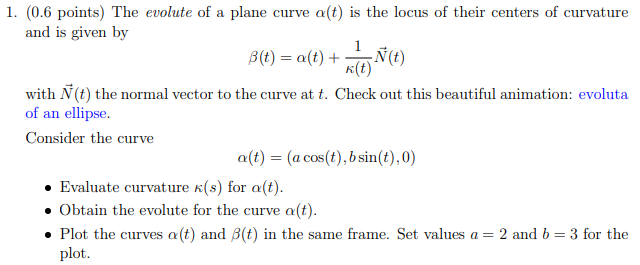

#### Respuesta

In [13]:
a, b = sp.symbols("a,b", positive = True, real = True)
t = sp.symbols("t")
x, y, z, al, dal, ddal, T, N, B, k, tao = sp.symbols("x, y, z, a, da, dda, T, N, B, k, tao", cls = sp.Function)
dal_norma = sp.symbols("dal_norma", cls = sp.Function)

x = a * sp.cos(t)
y = b * sp.sin(t)
z = 0
alpha = (x,y,z)

In [14]:

dal = sp.diff(x,t), sp.diff(y,t), sp.diff(z,t)
print("vector tangente",dal)

# norma del vector tangente
dal_norma = sp.sqrt(np.dot(dal,dal)).simplify()
#print("norma del vector tangente",dal_norma)

#vector tangente unitario
T = (sp.diff(x,t), sp.diff(y,t), sp.diff(z,t))
#print("vector tangente unitario",T)

#segunda derivada de la curva
ddal = (sp.diff(x,t,2), sp.diff(y,t,2), sp.diff(z,t,2))
#print("segunda derivada de la curva",ddal)
print("-----------------")
#calculo de la curvatura
alpha1 = sp.Matrix((2*cos(t), 3*sin(t),0))
dal1 = alpha1.diff()
dal2 = dal1.diff() 
k = dal1.cross(dal2).norm() / ((dal1).norm())**3 
print("calculo de la curvatura: ",k)
#print(k.subs(a,2).subs(b,3))
print("-----------------")
#vector normal unitario
ddal_norma = sp.sqrt(ddal[0]**2+ddal[1]**2+ddal[2]**2).simplify()
N = (-dal[1]/dal_norma, dal[0]/dal_norma, dal[2]/dal_norma)
#print("vector normal unitario",N)

#vector binomial 
B = (x+N[0]/k, y+N[1]/k, z+N[2]/k)
B = (B[0], B[1], B[2])
print("vector binomial: ",B)

vector tangente (-a*sin(t), b*cos(t), 0)
-----------------
calculo de la curvatura:  Abs(6*sin(t)**2 + 6*cos(t)**2)/(4*Abs(sin(t))**2 + 9*Abs(cos(t))**2)**(3/2)
-----------------
vector binomial:  (a*cos(t) - b*(4*Abs(sin(t))**2 + 9*Abs(cos(t))**2)**(3/2)*cos(t)/(sqrt(a**2*sin(t)**2 + b**2*cos(t)**2)*Abs(6*sin(t)**2 + 6*cos(t)**2)), -a*(4*Abs(sin(t))**2 + 9*Abs(cos(t))**2)**(3/2)*sin(t)/(sqrt(a**2*sin(t)**2 + b**2*cos(t)**2)*Abs(6*sin(t)**2 + 6*cos(t)**2)) + b*sin(t), 0)


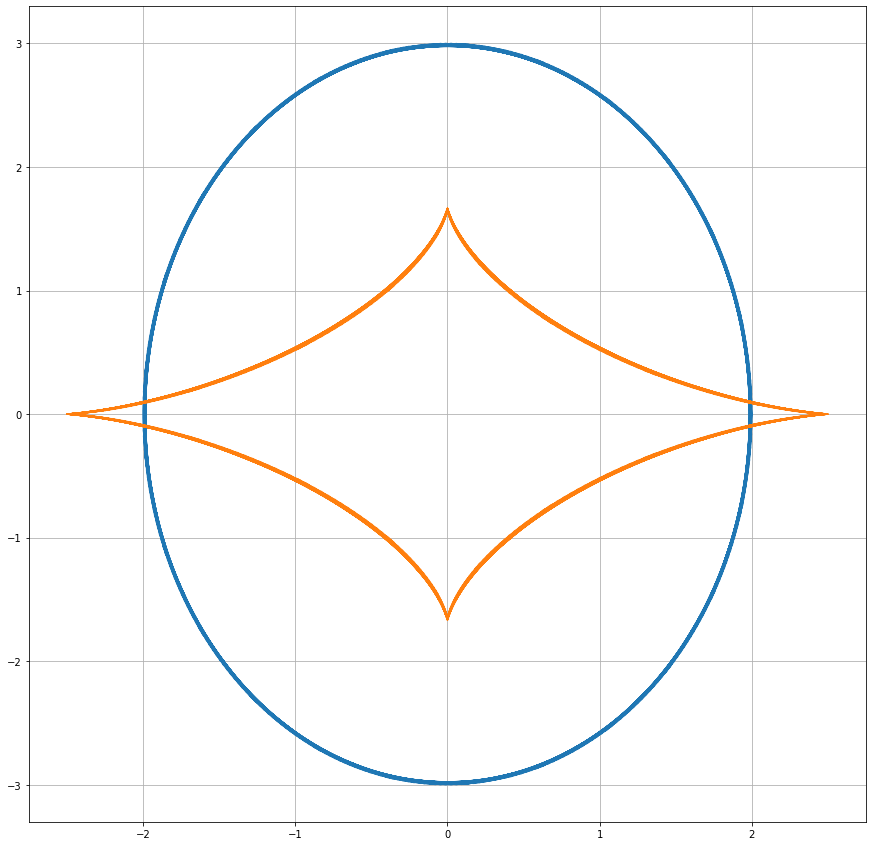

In [15]:
lins = np.linspace(-50, 50, 400)
X = lambdify(t, x.subs(a,2).subs(b,3))(lins)
Y = lambdify(t, y.subs(a,2).subs(b,3))(lins)
Bx = lambdify(t, B[0].subs(a,2).subs(b,3))(lins)
By = lambdify(t, B[1].subs(a,2).subs(b,3))(lins)

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
ax.plot(X, Y)
ax.plot(Bx,By) 

plt.grid(True)
plt.show()

#### Segundo punto

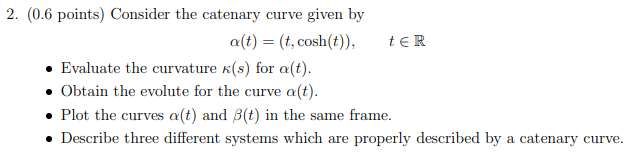

#### Respuesta

In [16]:
t = sp.symbols("t")
x, y, z, al, dal, ddal, T, N, B, k, tao = sp.symbols("x, y, z, a, da, dda, T, N, B, k, tao", cls = sp.Function)
dal_norma = sp.symbols("dal_norma", cls = sp.Function)

x = t
y = sp.cosh(t)
z = 0
alpha = (x,y,z)

#vector tangente
dal = sp.diff(x,t), sp.diff(y,t), sp.diff(z,t)
#print("vector tangente",dal)

# norma del vector tangente
dal_norma = sp.sqrt(np.dot(dal,dal)).simplify()
#print("norma del vector tangente",dal_norma) 

#vector tangente unitario
T = (sp.diff(x,t), sp.diff(y,t), sp.diff(z,t))
#print("vector tangente unitario",T)

#segunda derivada de la curva
ddal = (sp.diff(x,t,2), sp.diff(y,t,2), sp.diff(z,t,2))
#print("segunda derivada de la curva",ddal)
print("-----------------")
#calculo de la curvatura 
alpha1 = sp.Matrix((t, sp.cosh(t),0))
dal1 = alpha1.diff()
dal2 = dal1.diff() 
k = dal1.cross(dal2).norm() / ((dal1).norm())**3 
print("calculo de la curvatura: ",k)
print("-----------------")

#vector normal unitario
ddal_norma = sp.sqrt(ddal[0]**2+ddal[1]**2+ddal[2]**2).simplify()
N = (-dal[1]/dal_norma, dal[0]/dal_norma, dal[2]/dal_norma)
#print("vector normal unitario",N)

#vector binomial 
B = (x+N[0]/k, y+N[1]/k, z+N[2]/k)
B = (B[0], B[1], B[2])
print("vector binomial: ",B)

-----------------
calculo de la curvatura:  Abs(cosh(t))/(Abs(sinh(t))**2 + 1)**(3/2)
-----------------
vector binomial:  (t - (Abs(sinh(t))**2 + 1)**(3/2)*sinh(t)/(sqrt(cosh(t)**2)*Abs(cosh(t))), (Abs(sinh(t))**2 + 1)**(3/2)/(sqrt(cosh(t)**2)*Abs(cosh(t))) + cosh(t), 0)


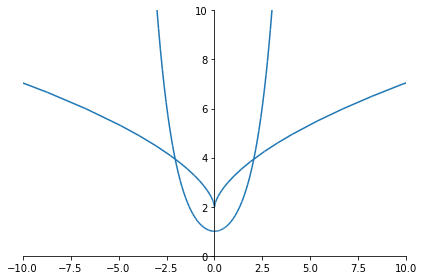

In [17]:
plot_parametric( (t, sp.cosh(t) ), (B[0],B[1]),(t, -3, 3),xlim=(-10,10),ylim=(0,10),axis_center=(0.0,0.0))  

**Sistemas descritos por una curva catenaria**
* Los cables eléctricos en las conexiones intermunicipales utilizan curvas catenarias.
* En la construcción de hornos, se utilizan las curvas catenarias como guía. Esto debido a que se usa la forma de una cadena colgante de ciertas dimensiones para crear la curva deseada y así poner allí el material de construcción.
* Los puentes colgantes utilizan las curvas catenarias, debido a que la fuerza ejercida es uniforme respecto a la longitud de la cadena.

#### Tercer punto

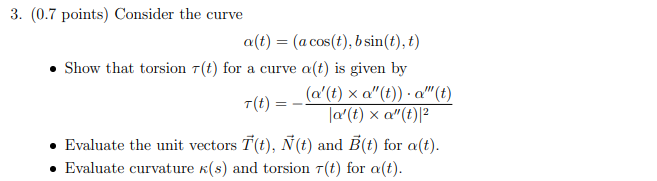

#### Respuesta

##### Demostracion:
Mostraremos que 
$$
\tau(s)=\frac{-\alpha'(s)\times\alpha''(s)\cdot\alpha'''(s)}{|\alpha'\times\alpha''|^2}
$$
    Primero observe que por la formula de Frenet–Serret:
$$
n(s)' = -\kappa(s) t(s) - \tau(s) b(s) \\
b(s)' = -\tau(s) n(s) \\
$$
    Por definicion sabemos que:
$$
b'(s) = t'(s)\wedge n(s)+t(s)\wedge n'(s). \\
\alpha'(s) = t(s) \\
\alpha''(s) = t'(s) = \kappa(s) n(s) \\
\alpha'''(s) = \kappa'(s) n(s) + \kappa(s) n'(s)
$$
    Con esto reemplazamos en $\alpha'''(s)$
$$
\alpha'''(s) = \kappa'(s) n(s) - \kappa(s)^2 t(s) - \kappa(s)\tau(s)b(s)
$$
    Ademas:
$$
\alpha'(s) \times \alpha''(s) = \kappa(s) n(s) t(s) = \kappa(s) b(s)
$$
    Tomando los anteriores resultados, observe que:
$$
(\alpha'(s) \times \alpha''(s)) \cdot \alpha'''(s) = -\kappa(s)^2 \tau(s) \\
\frac{(\alpha'(s) \times \alpha''(s)) \cdot \alpha'''(s)}{-\kappa(s)^2} = \tau(s)
$$
    Dado que el valor de k(s) es:
$$
k(s)^2 = |\alpha(s)''|^2  = |\alpha(s)'\times\alpha(s)''|^2 
$$
    Concluimos:
$$ 
\frac{(\alpha'(s) \times \alpha''(s)) \cdot \alpha'''(s)}{-|\alpha(s)'\times\alpha(s)''|^2} = \tau(s)
$$
Con lo cual queda demostrada la afirmacion.

**Parte b**

In [18]:
a, b = sp.symbols("a,b", positive = True, real = True)
s = sp.symbols("s")
x, y, z, al, dal, ddal, T, N, B, k, tao = sp.symbols("x, y, z, a, da, dda, T, N, B, k, tao", cls = sp.Function)
dal_norma = sp.symbols("dal_norma", cls = sp.Function)

x = a * sp.cos(s)
y = b * sp.sin(s)
z = s
alpha = (x,y,z)


#vector tangente
dal = sp.diff(x,s), sp.diff(y,s), sp.diff(z,s)
#print("vector tangente",dal)

# norma del vector tangente
dal_norma = sp.sqrt(np.dot(dal,dal)).simplify()
#print("norma del vector tangente",dal_norma)

print("-----------------")

#vector tangente unitario
T = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
print("vector tangente unitario",T)

#verifico la normalizacion
#print("verifico la normalizacion",sp.sqrt(np.dot(T,T)).simplify())

#segunda derivada de la curva
ddal = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
#print("segunda derivada de la curva",ddal)

print("-----------------")

#calculo de la curvatura
k = sp. sqrt(np.dot(ddal, ddal)).simplify()
print("calculo de la curvatura",k)
print(k.subs(a,3).subs(b,4))

print("-----------------")

#vector normal unitario
N = (sp.diff(x,s,2) / k, sp.diff(y,s,2) / k, sp.diff(z,s,2) / k)
print("vector normal unitario",N)

print("-----------------")

#vector binomial 
B = np.cross(T,N)
B = (B[0], B[1], B[2])
print("vector binomial ",B)

#verifico la normalizacion 
#print("verifico la normalizacion ",sp.sqrt(np.dot(B,B)).simplify())

#derivada del vector binomial
dB = (sp.diff(B[0], s), sp.diff(B[1], s), sp.diff(B[2],s))
#print("derivada del vector binomial",dB)

print("-----------------")

#Torsion
tao = sp.sqrt(np.dot(dB, dB)).simplify()
print("Torsion",tao)
print(tao.subs(a,3).subs(b,4))

-----------------
vector tangente unitario (-a*sin(s), b*cos(s), 1)
-----------------
calculo de la curvatura sqrt(a**2*cos(s)**2 + b**2*sin(s)**2)
sqrt(16*sin(s)**2 + 9*cos(s)**2)
-----------------
vector normal unitario (-a*cos(s)/sqrt(a**2*cos(s)**2 + b**2*sin(s)**2), -b*sin(s)/sqrt(a**2*cos(s)**2 + b**2*sin(s)**2), 0)
-----------------
vector binomial  (b*sin(s)/sqrt(a**2*cos(s)**2 + b**2*sin(s)**2), -a*cos(s)/sqrt(a**2*cos(s)**2 + b**2*sin(s)**2), a*b*sin(s)**2/sqrt(a**2*cos(s)**2 + b**2*sin(s)**2) + a*b*cos(s)**2/sqrt(a**2*cos(s)**2 + b**2*sin(s)**2))
-----------------
Torsion a*b*sqrt((a**2*cos(s)**2 + b**2*sin(s)**2 + (1 - cos(4*s))*(a**2 - b**2)**2/8)/(a**2*cos(s)**2 + b**2*sin(s)**2)**3)
12*sqrt((16*sin(s)**2 + 9*cos(s)**2 - 49*cos(4*s)/8 + 49/8)/(16*sin(s)**2 + 9*cos(s)**2)**3)
